In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc


In [ ]:
# veri yükle (unnamed columnu burda siliyoz direkt drop yapınca datalar kayıyor)
data = pd.read_csv('/content/drive/MyDrive/databreast.csv', usecols=lambda col: col not in ['id', 'Unnamed: 32'])


In [ ]:
# veri bilgi
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# boş veri kontrolü
data.isna().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [ ]:
# Hedef değişkeni dönüştürme
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
#features diagnosis cünkü = (tümörün Malign (1) mi yoksa Benign (0) mi)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [ ]:
# veriyi test train ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Veri normalizasyonu (-1 ile 1 arası ayır)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_preds_class = [1 if x > 0.5 else 0 for x in lr_preds] # Eğer tahmin edilen sayı > 0.5 ise: malign,else benign
print("Linear Regression Accuracy:", accuracy_score(y_test, lr_preds_class))

Linear Regression Accuracy: 0.956140350877193


In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))

Decision Tree Accuracy: 0.9473684210526315


In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

Random Forest Accuracy: 0.9649122807017544


In [ ]:
print("Linear Regression Accuracy:", accuracy_score(y_test, lr_preds_class))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

Linear Regression Accuracy: 0.956140350877193
Decision Tree Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.9649122807017544


en yüksek accuracy random forest'da görülüyor dökümandaki gibi

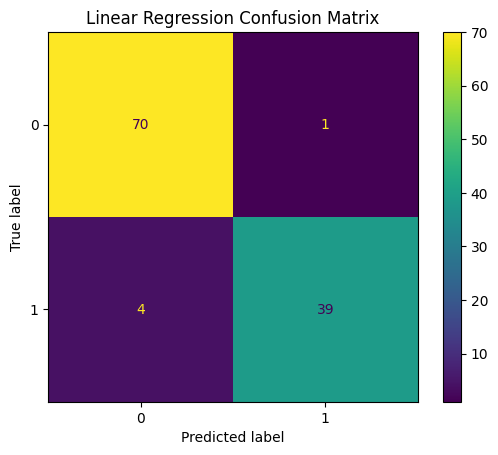

In [ ]:
# Linear Regression Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, lr_preds_class)
plt.title("Linear Regression Confusion Matrix")
plt.show()

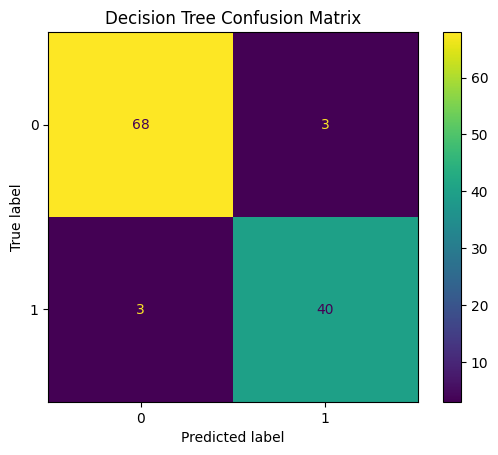

In [ ]:
# Decision Tree Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, dt_preds)
plt.title("Decision Tree Confusion Matrix")
plt.show()

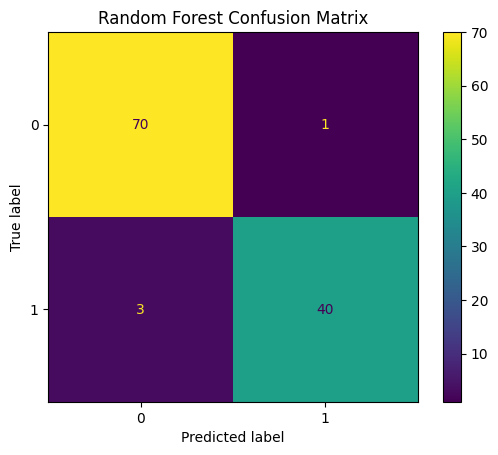

In [ ]:
# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, rf_preds)
plt.title("Random Forest Confusion Matrix")
plt.show()


In [ ]:
# Precision recall ve F1-score
from sklearn.metrics import classification_report


print("Linear Regression Report:")
print(classification_report(y_test, lr_preds_class))

print("Decision Tree Report:")
print(classification_report(y_test, dt_preds))

print("Random Forest Report:")
print(classification_report(y_test, rf_preds))

Linear Regression Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Random Forest Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weig

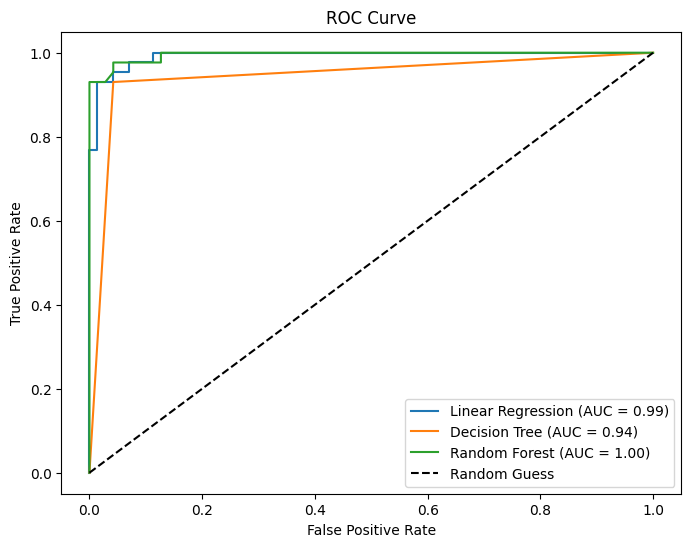

In [ ]:
from sklearn.metrics import roc_curve, auc

# Modellerin olasılık tahminlerini alalım
lr_probs = lr.predict(X_test)  # Linear Regression doğrudan score verir
dt_probs = dt.predict_proba(X_test)[:, 1]  # Decision Tree için pozitif sınıf olasılığı
rf_probs = rf.predict_proba(X_test)[:, 1]  # Random Forest için pozitif sınıf olasılığı

# Linear Regression için ROC hesaplama (doğrudan pred değil, tahmini skor)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)

# Decision Tree için ROC
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = auc(dt_fpr, dt_tpr)

# Random Forest için ROC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# ROC Eğrileri
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f'Linear Regression (AUC = {lr_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')

# Rastgele tahmin için referans çizgisi
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
